In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df = pd.read_csv("/Users/ayeshasaeed/Documents/Spring 2024/QTM 347 ML/archive (1)/diabetes_binary_health_indicators_BRFSS2015.csv")
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [3]:
df.shape

(253680, 22)

In [4]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

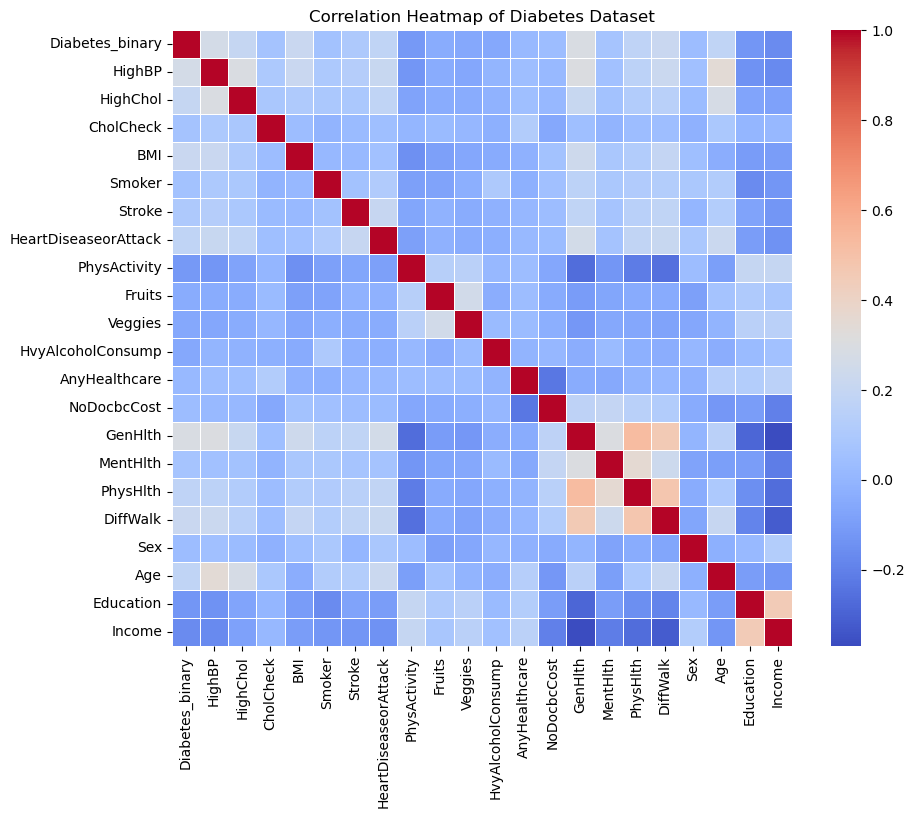

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.show()


## KNN

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separate features (X) and target variable (y)
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Preprocess the data: scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the k-NN model
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8477018290760012

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91     43525
         1.0       0.43      0.21      0.28      7211

    accuracy                           0.85     50736
   macro avg       0.65      0.58      0.60     50736
weighted avg       0.82      0.85      0.82     50736



In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
n_neighbors = range(1,14)
for i, n in enumerate(n_neighbors):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = knn.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(n)
    print("Accuracy:", accuracy)
    print("Mean Squared Error:", mse)
    

1
Accuracy: 0.803610848312835
Mean Squared Error: 0.19638915168716492
2
Accuracy: 0.8504809208451592
Mean Squared Error: 0.14951907915484075
3
Accuracy: 0.8362898139388205
Mean Squared Error: 0.16371018606117943
4
Accuracy: 0.8537330495111952
Mean Squared Error: 0.14626695048880478
5
Accuracy: 0.8477018290760012
Mean Squared Error: 0.15229817092399875
6
Accuracy: 0.8551915799432356
Mean Squared Error: 0.14480842005676442
7
Accuracy: 0.8516635130873541
Mean Squared Error: 0.14833648691264587
8
Accuracy: 0.8570245979186376
Mean Squared Error: 0.14297540208136233
9
Accuracy: 0.8547973825291706
Mean Squared Error: 0.14520261747082938
10
Accuracy: 0.8576750236518449
Mean Squared Error: 0.14232497634815516
11
Accuracy: 0.8561573636076948
Mean Squared Error: 0.14384263639230527
12
Accuracy: 0.8584239987385682
Mean Squared Error: 0.14157600126143172
13
Accuracy: 0.8572019867549668
Mean Squared Error: 0.1427980132450331


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error

# Define the parameter grid
param_grid = {'n_neighbors': range(1, 14)}

# Initialize KNeighborsClassifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator
best_knn = grid_search.best_estimator_

# Make predictions on the testing data using the best estimator
y_pred = best_knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Best n_neighbors:", best_knn.get_params()['n_neighbors'])
print("Accuracy:", accuracy)
print("Mean Squared Error:", mse)


Best n_neighbors: 12
Accuracy: 0.8584239987385682
Mean Squared Error: 0.14157600126143172


### Logistic Regression (not used)

In [169]:
from ISLP.models import summarize
logit_model =  sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = logit_model.fit()
summarize(results)

,coef,std err,z,P>|z|
HighBP,0.8433,0.022,39.139,0.000
HighChol,0.6198,0.021,30.084,0.000
CholCheck,-0.7780,0.056,-13.787,0.000
BMI,0.0364,0.001,25.108,0.000
Smoker,-0.1398,0.020,-6.854,0.000
Stroke,0.1381,0.045,3.044,0.002
HeartDiseaseorAttack,0.3760,0.032,11.909,0.000
PhysActivity,-0.2117,0.023,-9.268,0.000
Fruits,-0.0917,0.021,-4.325,0.000
Veggies,-0.1850,0.025,-7.308,0.000


In [170]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

glm_fit = LogisticRegression().fit(X_train, y_train)

logit_pr = glm_fit.predict_proba(X_test)[:, 1]
logit_est = np.where(logit_pr > 0.5, 1, 0)

misclassification_error = np.mean(logit_est !=  y_test)
print(misclassification_error)

# Calculate the test MSE
test_mse = mean_squared_error(y_test, logit_est)

# Print the test MSE
print("Test Mean Squared Error (MSE):", test_mse)

0.25213947238135653
Test Mean Squared Error (MSE): 0.25213947238135653


## Decision tree

In [9]:
from sklearn.tree import DecisionTreeClassifier as DTC
from ISLP.models import ModelSpec as MS

Diabetes = np.where(df.Diabetes_binary > 0, "Yes", "No")

In [10]:
model = MS(df.columns.drop('Diabetes_binary'), intercept=False) 
D = model.fit_transform(df)
feature_names = list(D.columns)
X = np.asarray(D)

/Users/ayeshasaeed/anaconda3/lib/python3.11/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
/Users/ayeshasaeed/anaconda3/lib/python3.11/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
/Users/ayeshasaeed/anaconda3/lib/python3.11/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]

In [11]:
clf = DTC(criterion='gini', 
          max_depth=4, 
          random_state=0) 

clf.fit(X, Diabetes)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(Diabetes, clf.predict(X))


0.8623935666982024

In [16]:
import sklearn.model_selection as skm

validation = skm.ShuffleSplit(n_splits=1, 
                              test_size=200,
                              random_state=0)
results = skm.cross_validate(clf,
                             D,
                             Diabetes,
                             cv=validation)
results['test_score']

array([0.87])

In [17]:
(X_train, X_test, Diabetes_train, Diabetes_test) = skm.train_test_split(X,
                                                                Diabetes, 
                                                                test_size=0.5, 
                                                                random_state=0)

### Accuracy score for Decision Tree

In [52]:
for max_depth in range(1, 11):
    # Define your decision tree classifier with specified parameters
    clf = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=max_depth)
    
    # Train the classifier
    clf.fit(X_train, Diabetes_train)
    
    # Calculate accuracy score using accuracy_score function
    accuracy = accuracy_score(Diabetes_test, clf.predict(X_test))
    
    # Alternatively, you can also use clf.score() method
    score = clf.score(X_test, Diabetes_test)
    
    # Print accuracy score for the current max_depth
    print(f"Max Depth: {max_depth}, Accuracy Score: {accuracy}, Score: {score}")

Max Depth: 1, Accuracy Score: 0.8591847997477137, Score: 0.8591847997477137
Max Depth: 2, Accuracy Score: 0.8591847997477137, Score: 0.8591847997477137
Max Depth: 3, Accuracy Score: 0.8591847997477137, Score: 0.8591847997477137
Max Depth: 4, Accuracy Score: 0.8613371176285084, Score: 0.8613371176285084
Max Depth: 5, Accuracy Score: 0.8636392305266477, Score: 0.8636392305266477
Max Depth: 6, Accuracy Score: 0.8636392305266477, Score: 0.8636392305266477
Max Depth: 7, Accuracy Score: 0.8634500157678966, Score: 0.8634500157678966
Max Depth: 8, Accuracy Score: 0.8629690949227373, Score: 0.8629690949227373
Max Depth: 9, Accuracy Score: 0.8621097445600757, Score: 0.8621097445600757
Max Depth: 10, Accuracy Score: 0.8601781772311574, Score: 0.8601781772311574


We can see that a max_depth of 5 or 6 both give similar accuracy scores. They perform the best compared ot other max_depth values.

[Text(0.5, 0.9285714285714286, 'HighBP <= 0.5\ngini = 0.238\nsamples = 126840\nvalue = [109355, 17485]\nclass = No Diabetes'),
 Text(0.25, 0.7857142857142857, 'GenHlth <= 2.5\ngini = 0.111\nsamples = 72521\nvalue = [68253, 4268]\nclass = No Diabetes'),
 Text(0.125, 0.6428571428571429, 'Age <= 9.5\ngini = 0.051\nsamples = 46818\nvalue = [45595, 1223]\nclass = No Diabetes'),
 Text(0.0625, 0.5, 'BMI <= 32.5\ngini = 0.035\nsamples = 36383\nvalue = [35733, 650]\nclass = No Diabetes'),
 Text(0.03125, 0.35714285714285715, 'HighChol <= 0.5\ngini = 0.028\nsamples = 32586\nvalue = [32126, 460]\nclass = No Diabetes'),
 Text(0.015625, 0.21428571428571427, 'BMI <= 27.5\ngini = 0.019\nsamples = 25469\nvalue = [25220, 249]\nclass = No Diabetes'),
 Text(0.0078125, 0.07142857142857142, 'gini = 0.014\nsamples = 19536\nvalue = [19396, 140]\nclass = No Diabetes'),
 Text(0.0234375, 0.07142857142857142, 'gini = 0.036\nsamples = 5933\nvalue = [5824, 109]\nclass = No Diabetes'),
 Text(0.046875, 0.214285714285

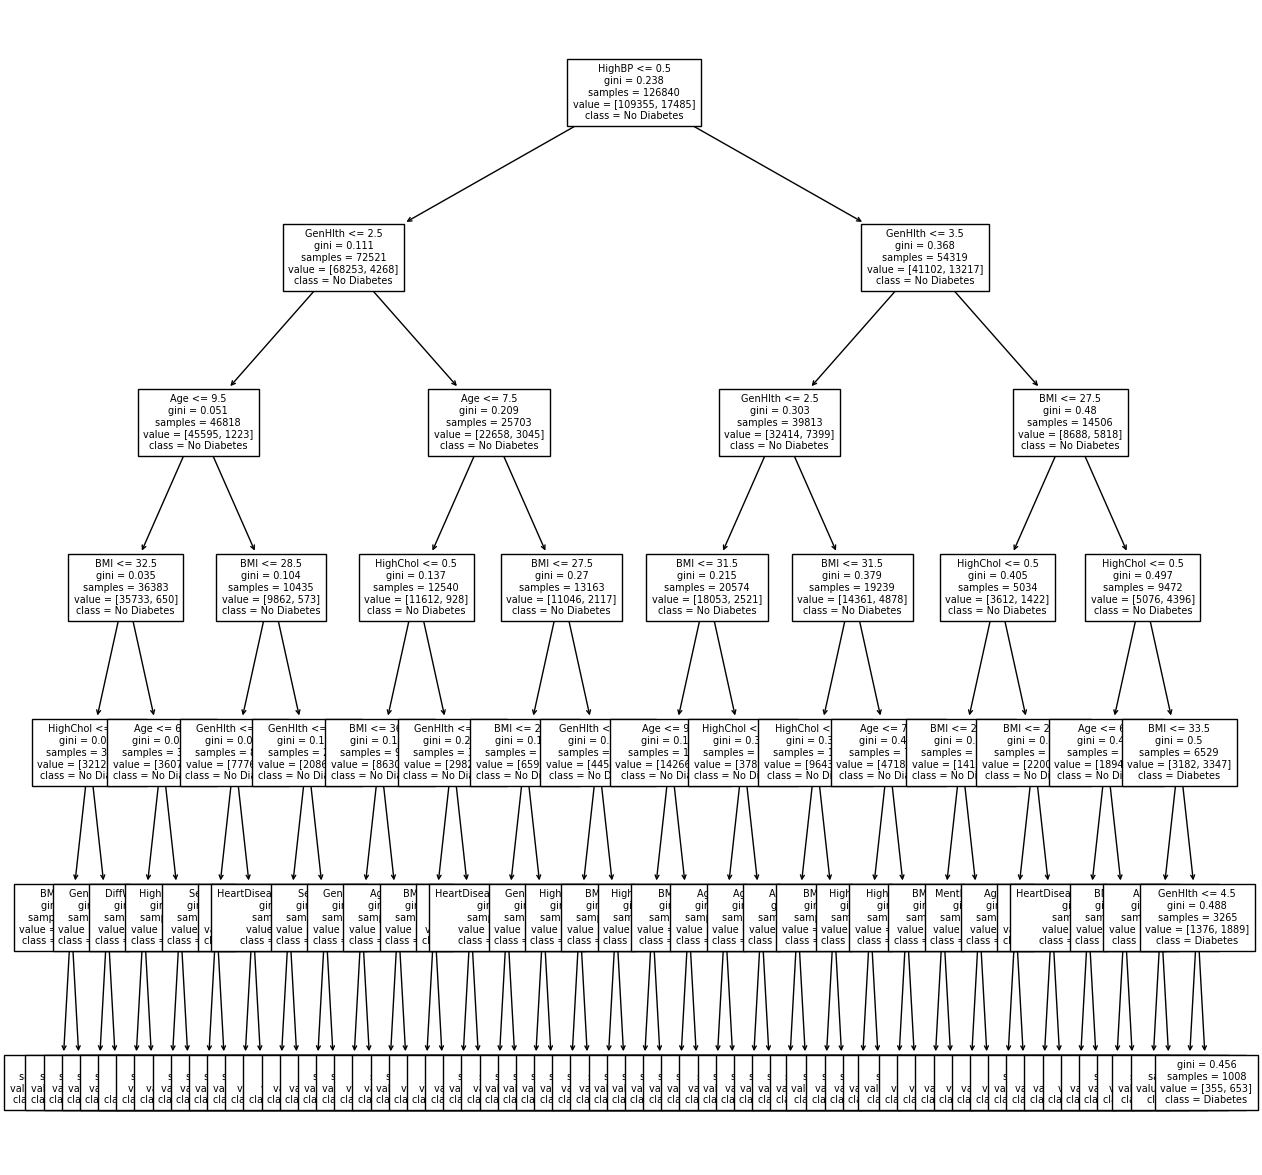

In [33]:
from matplotlib.pyplot import subplots
from sklearn.tree import DecisionTreeClassifier, plot_tree
ax = subplots(figsize=(15, 15))[1] 
plot_tree(clf,
          feature_names=feature_names, 
          class_names=['No Diabetes', 'Diabetes'],
          ax=ax,
          impurity=True,
          fontsize=7)

[Text(0.5, 0.9285714285714286, 'HighBP <= 0.5\ngini = 0.238\nsamples = 126840\nvalue = [109355, 17485]\nclass = No diabetes'),
 Text(0.25, 0.7857142857142857, 'GenHlth <= 2.5\n0.111\n72521\n[68253, 4268]\nNo diabetes'),
 Text(0.125, 0.6428571428571429, 'Age <= 9.5\n0.051\n46818\n[45595, 1223]\nNo diabetes'),
 Text(0.0625, 0.5, 'BMI <= 32.5\n0.035\n36383\n[35733, 650]\nNo diabetes'),
 Text(0.03125, 0.35714285714285715, 'HighChol <= 0.5\n0.028\n32586\n[32126, 460]\nNo diabetes'),
 Text(0.015625, 0.21428571428571427, 'BMI <= 27.5\n0.019\n25469\n[25220, 249]\nNo diabetes'),
 Text(0.0078125, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.0234375, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.046875, 0.21428571428571427, 'GenHlth <= 1.5\n0.058\n7117\n[6906, 211]\nNo diabetes'),
 Text(0.0390625, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.0546875, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.09375, 0.35714285714285715, 'Age <= 6.5\n0.095\n3797\n[3607, 190]\nNo diabetes'),
 Text(0.078125

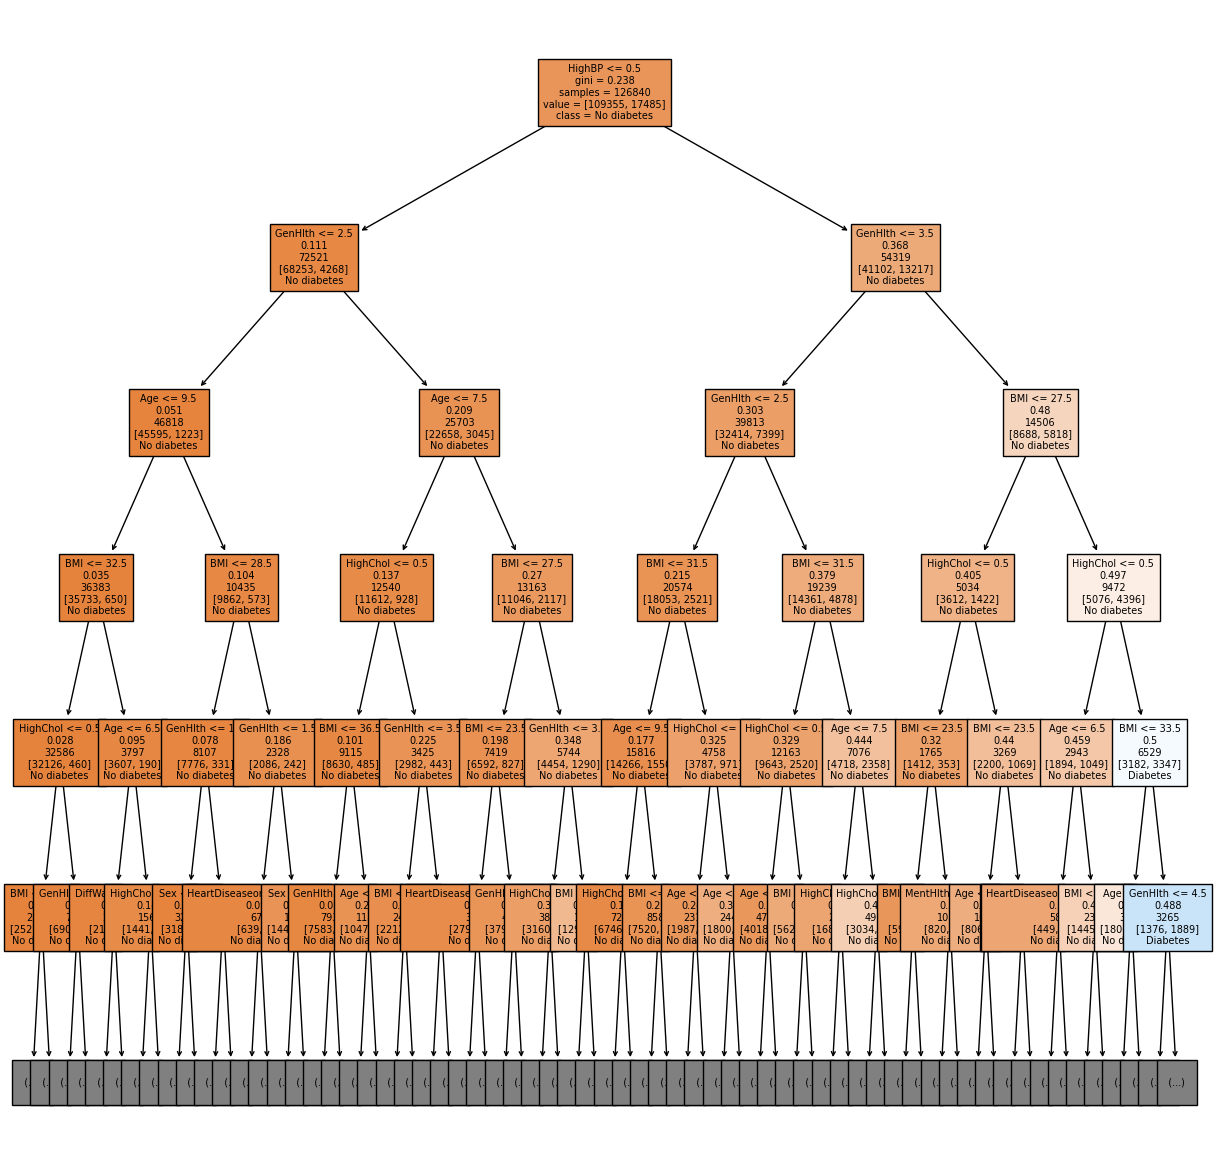

In [48]:
ax = subplots(figsize=(15, 15))[1]
plot_tree(clf, 
          feature_names = list(D.columns),  
            max_depth=5, 
            class_names = ['No diabetes', 'Diabetes'],
            ax=ax,
            label='root', 
            filled=True,
            fontsize=7)

In [49]:
feature_importances = clf.feature_importances_

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                 Feature  Importance
0                 HighBP    0.382398
13               GenHlth    0.309465
3                    BMI    0.146961
18                   Age    0.069741
1               HighChol    0.061102
6   HeartDiseaseorAttack    0.010267
16              DiffWalk    0.004649
10     HvyAlcoholConsump    0.003218
20                Income    0.002926
17                   Sex    0.001908
19             Education    0.001893
4                 Smoker    0.001374
7           PhysActivity    0.001205
14              MentHlth    0.000946
15              PhysHlth    0.000850
8                 Fruits    0.000636
5                 Stroke    0.000462
9                Veggies    0.000000
11         AnyHealthcare    0.000000
12           NoDocbcCost    0.000000
2              CholCheck    0.000000


In [50]:
from sklearn.tree import export_text
print(export_text(clf, 
                  feature_names=feature_names,
                  show_weights=True))

|--- HighBP <= 0.50
|   |--- GenHlth <= 2.50
|   |   |--- Age <= 9.50
|   |   |   |--- BMI <= 32.50
|   |   |   |   |--- HighChol <= 0.50
|   |   |   |   |   |--- BMI <= 27.50
|   |   |   |   |   |   |--- GenHlth <= 1.50
|   |   |   |   |   |   |   |--- weights: [9134.00, 30.00] class: No
|   |   |   |   |   |   |--- GenHlth >  1.50
|   |   |   |   |   |   |   |--- weights: [10262.00, 110.00] class: No
|   |   |   |   |   |--- BMI >  27.50
|   |   |   |   |   |   |--- Age <= 6.50
|   |   |   |   |   |   |   |--- weights: [3457.00, 40.00] class: No
|   |   |   |   |   |   |--- Age >  6.50
|   |   |   |   |   |   |   |--- weights: [2367.00, 69.00] class: No
|   |   |   |   |--- HighChol >  0.50
|   |   |   |   |   |--- GenHlth <= 1.50
|   |   |   |   |   |   |--- Education <= 3.50
|   |   |   |   |   |   |   |--- weights: [36.00, 3.00] class: No
|   |   |   |   |   |   |--- Education >  3.50
|   |   |   |   |   |   |   |--- weights: [2226.00, 20.00] class: No
|   |   |   |   |   |--- Gen

In [43]:
clf.tree_.n_leaves

64

### Confusion Table

In [44]:
from ISLP import confusion_table 
print(accuracy_score(Diabetes_test, clf.predict(X_test)))
confusion = confusion_table(clf.predict(X_test), 
                            Diabetes_test)
confusion

0.8636392305266477


Truth,No,Yes
Predicted,,
No,107667,15984
Yes,1312,1877


### Pruning Decision Tree

In [53]:
ccp_path = clf.cost_complexity_pruning_path(X_train, Diabetes_train) 
kfold = skm.KFold(10, random_state=1, shuffle=True)

In [54]:
grid = skm.GridSearchCV(clf, 
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy') 
grid.fit(X_train, Diabetes_train)
grid.best_score_

0.8664538000630715

[Text(0.40546875, 0.9285714285714286, 'HighBP <= 0.5\ngini = 0.238\nsamples = 126840\nvalue = [109355, 17485]\nclass = No diabetes'),
 Text(0.1234375, 0.7857142857142857, 'GenHlth <= 2.5\n0.111\n72521\n[68253, 4268]\nNo diabetes'),
 Text(0.05, 0.6428571428571429, 'Age <= 9.5\n0.051\n46818\n[45595, 1223]\nNo diabetes'),
 Text(0.025, 0.5, 'BMI <= 32.5\n0.035\n36383\n[35733, 650]\nNo diabetes'),
 Text(0.0125, 0.35714285714285715, '0.028\n32586\n[32126, 460]\nNo diabetes'),
 Text(0.0375, 0.35714285714285715, '0.095\n3797\n[3607, 190]\nNo diabetes'),
 Text(0.075, 0.5, 'BMI <= 28.5\n0.104\n10435\n[9862, 573]\nNo diabetes'),
 Text(0.0625, 0.35714285714285715, '0.078\n8107\n[7776, 331]\nNo diabetes'),
 Text(0.0875, 0.35714285714285715, '0.186\n2328\n[2086, 242]\nNo diabetes'),
 Text(0.196875, 0.6428571428571429, 'Age <= 7.5\n0.209\n25703\n[22658, 3045]\nNo diabetes'),
 Text(0.1375, 0.5, 'HighChol <= 0.5\n0.137\n12540\n[11612, 928]\nNo diabetes'),
 Text(0.1125, 0.35714285714285715, 'BMI <= 36.5

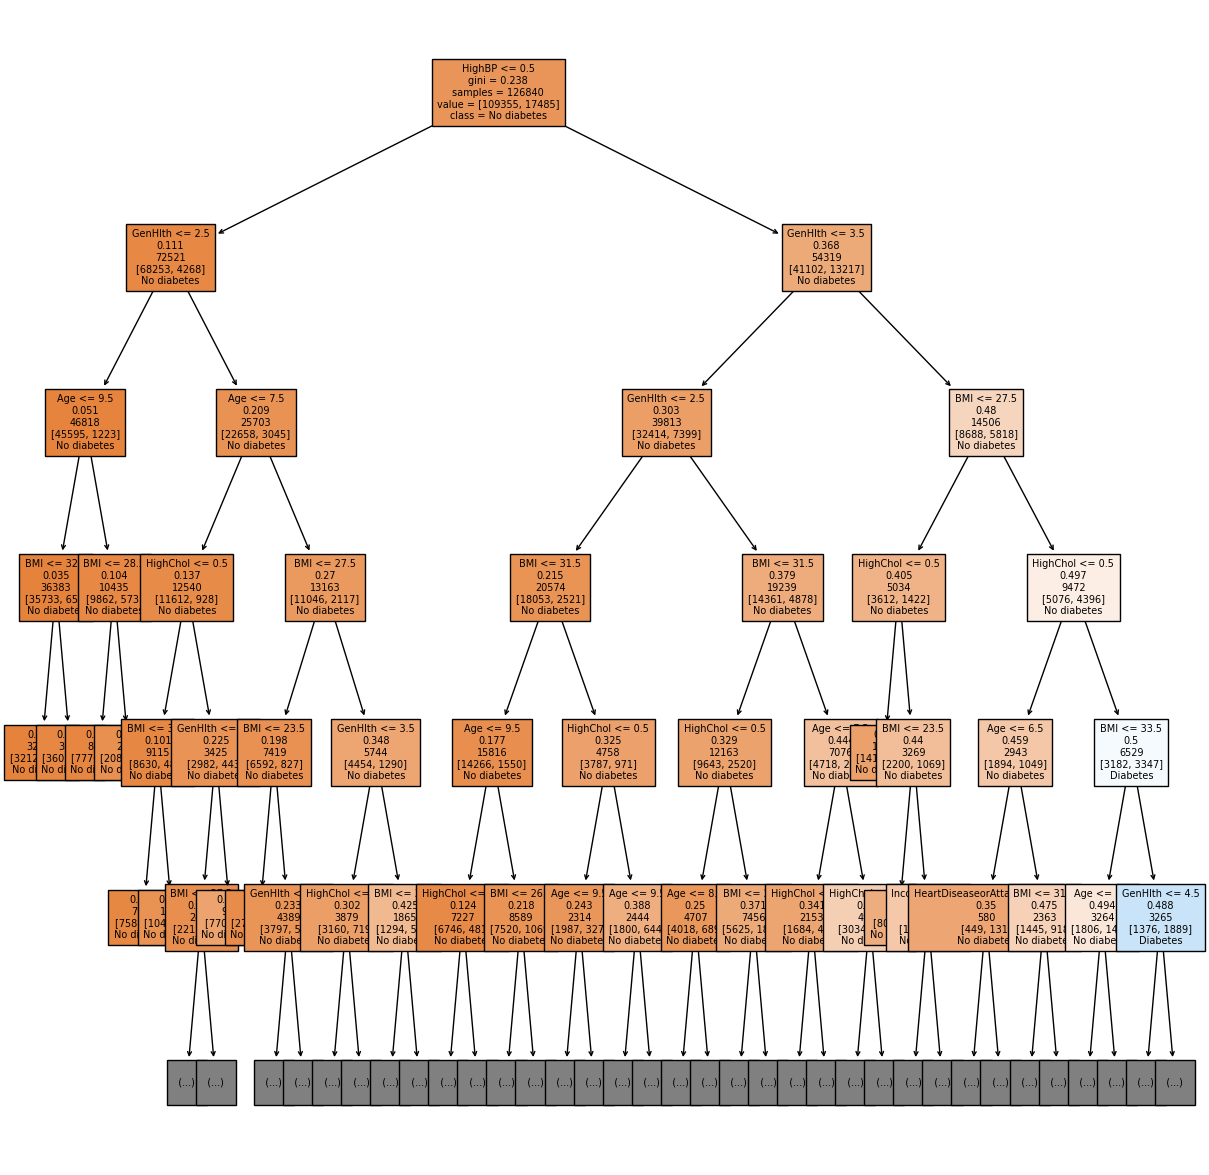

In [55]:
ax = subplots(figsize=(15, 15))[1]
best_ = grid.best_estimator_ 
plot_tree(best_, 
          feature_names = list(D.columns),  
            max_depth=5, 
            class_names = ['No diabetes', 'Diabetes'],
            ax=ax,
            label='root', 
            filled=True,
            fontsize=7)

In [56]:
print(export_text(best_, 
                  feature_names=feature_names,
                  show_weights=True))

|--- HighBP <= 0.50
|   |--- GenHlth <= 2.50
|   |   |--- Age <= 9.50
|   |   |   |--- BMI <= 32.50
|   |   |   |   |--- weights: [32126.00, 460.00] class: No
|   |   |   |--- BMI >  32.50
|   |   |   |   |--- weights: [3607.00, 190.00] class: No
|   |   |--- Age >  9.50
|   |   |   |--- BMI <= 28.50
|   |   |   |   |--- weights: [7776.00, 331.00] class: No
|   |   |   |--- BMI >  28.50
|   |   |   |   |--- weights: [2086.00, 242.00] class: No
|   |--- GenHlth >  2.50
|   |   |--- Age <= 7.50
|   |   |   |--- HighChol <= 0.50
|   |   |   |   |--- BMI <= 36.50
|   |   |   |   |   |--- weights: [7583.00, 347.00] class: No
|   |   |   |   |--- BMI >  36.50
|   |   |   |   |   |--- weights: [1047.00, 138.00] class: No
|   |   |   |--- HighChol >  0.50
|   |   |   |   |--- GenHlth <= 3.50
|   |   |   |   |   |--- BMI <= 37.50
|   |   |   |   |   |   |--- weights: [2010.00, 176.00] class: No
|   |   |   |   |   |--- BMI >  37.50
|   |   |   |   |   |   |--- weights: [202.00, 59.00] class: No